In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [23]:
cust=pd.read_csv("Customer.csv")
trans=pd.read_csv("Transactions.csv")
prod_hir=pd.read_csv("prod_cat_info.csv")

print(cust.head(2))
print(trans.head(2))
print(prod_hir.head(2))

   customer_Id         DOB Gender  city_code
0       268408  02-01-1970      M        4.0
1       269696  07-01-1970      F        8.0
   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   

   Rate      Tax  total_amt Store_type  
0  -772  405.300  -4265.300     e-Shop  
1 -1497  785.925  -8270.925     e-Shop  
   prod_cat_code  prod_cat  prod_sub_cat_code prod_subcat
0              1  Clothing                  4        Mens
1              1  Clothing                  1       Women


In [24]:
## Ques 1
cust_trans=pd.merge(cust,trans,how='inner',left_on='customer_Id', right_on='cust_id')
Customer_final=pd.merge(cust_trans,prod_hir,how='inner',left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])

In [44]:
Customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,1970-01-02,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,1970-01-16,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,1970-01-18,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,1970-01-22,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,1970-01-29,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [26]:
## Ques 2 (a)
print(Customer_final.dtypes)
print(Customer_final.columns)

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object
Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')


In [27]:
## Ques 2 (b)
print(Customer_final.head(10))
print(Customer_final.tail(10))

   customer_Id         DOB Gender  city_code  transaction_id  cust_id  \
0       268408  02-01-1970      M        4.0     87243835584   268408   
1       275152  16-01-1970      M        4.0     73109425404   275152   
2       275034  18-01-1970      F        4.0     64777271023   275034   
3       270829  22-01-1970      F        8.0     87174343938   270829   
4       267657  29-01-1970      F        7.0     76242744953   267657   
5       274630  01-02-1970      M        4.0     78357345891   274630   
6       273541  01-02-1970      M        4.0     23916816961   273541   
7       269008  13-02-1970      F        6.0     35560569829   269008   
8       269008  13-02-1970      F        6.0     94033312891   269008   
9       267199  14-02-1970    NaN        2.0     56749259881   267199   

    tran_date  prod_subcat_code  prod_cat_code  Qty  Rate      Tax  total_amt  \
0  13-01-2014                 7              5    5   187   98.175   1033.175   
1  25-03-2011                 7   

In [28]:
## Ques 2 (c)
Customer_final.loc[:,['Qty','Rate','Tax','total_amt']].describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,23053.0,2.432395,2.268406,-5.000,1.00,3.00,4.000,5.0
Rate,23053.0,636.369713,622.363498,-1499.000,312.00,710.00,1109.000,1500.0
Tax,23053.0,248.667192,187.177773,7.350,98.28,199.08,365.715,787.5
total_amt,23053.0,2107.308002,2507.561264,-8270.925,762.45,1754.74,3569.150,8287.5


In [29]:
## Ques 2 (d)
#### Frequency table for all categorical variables
print(pd.crosstab(Customer_final['customer_Id'],columns='count').head())
print(pd.crosstab(Customer_final['DOB'],columns='count').head())
print(pd.crosstab(Customer_final['Gender'],columns='count').head())
print(pd.crosstab(Customer_final['city_code'],columns='count').head())
print(pd.crosstab(Customer_final['transaction_id'],columns='count').head())
print(pd.crosstab(Customer_final['tran_date'],columns='count').head())
print(pd.crosstab(Customer_final['prod_subcat_code'],columns='count').head())
print(pd.crosstab(Customer_final['prod_cat_code'],columns='count').head())
print(pd.crosstab(Customer_final['Store_type'],columns='count').head())
print(pd.crosstab(Customer_final['prod_cat'],columns='count').head())

col_0        count
customer_Id       
266783           5
266784           3
266785           8
266788           4
266794          12
col_0       count
DOB              
01-01-1972      5
01-01-1978      4
01-01-1979      3
01-01-1980     10
01-01-1981      4
col_0   count
Gender       
F       11233
M       11811
col_0      count
city_code       
1.0         2258
2.0         2270
3.0         2411
4.0         2422
5.0         2360
col_0           count
transaction_id       
3268991             1
7073244             1
10861359            1
15741026            1
16165359            1
col_0      count
tran_date       
1/1/2012      12
1/1/2013      19
1/1/2014      31
1/10/2011     19
1/10/2012     19
col_0             count
prod_subcat_code       
1                  2950
2                  1007
3                  3067
4                  4002
5                   958
col_0          count
prod_cat_code       
1               2960
2               2999
3               4898
4               1998

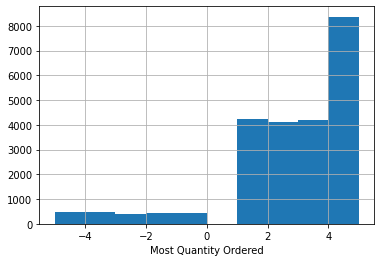

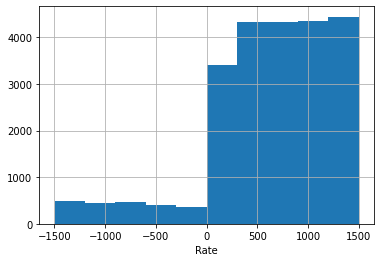

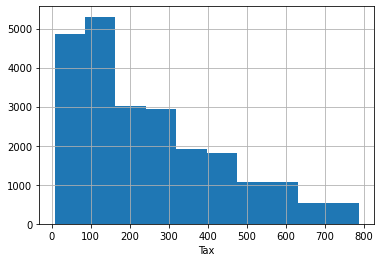

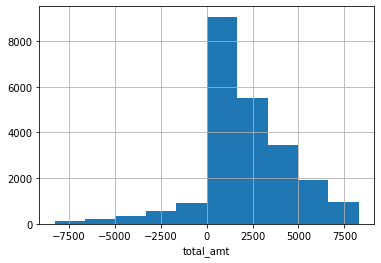

In [30]:
## Ques 3
#### Histograms for all continuous variables
## Quantity
Customer_final['Qty'].hist()
plt.xlabel('Most Quantity Ordered')
plt.show()

## Rate
Customer_final['Rate'].hist()
plt.xlabel('Rate')
plt.show()

## Tax
Customer_final['Tax'].hist()
plt.xlabel('Tax')
plt.show()

## total_amt
Customer_final['total_amt'].hist()
plt.xlabel('total_amt')
plt.show()


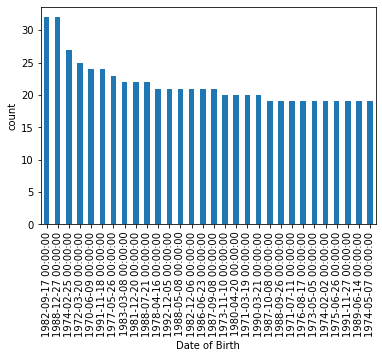

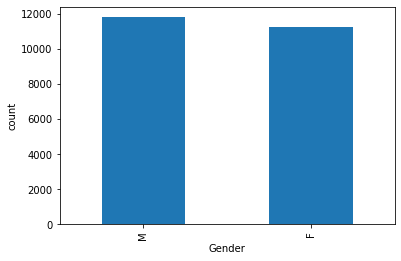

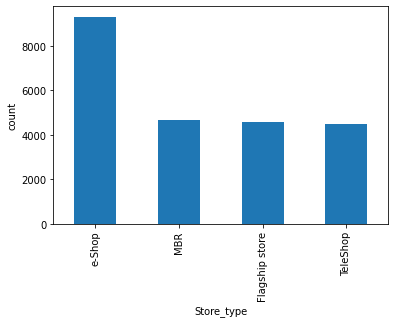

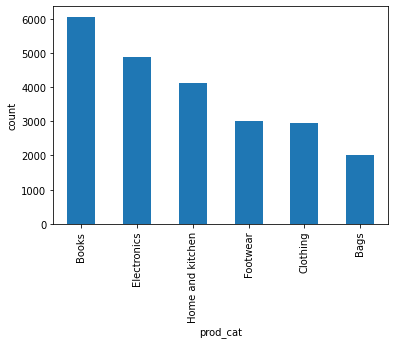

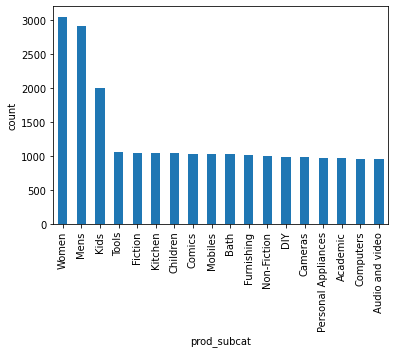

In [33]:
## Ques 3
##### Frequency bar for all categorical variable
## DOB
Customer_final['DOB']=Customer_final['DOB'].apply(lambda x:pd.to_datetime(x,format='%d-%m-%Y'))
Customer_final['DOB'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Date of Birth')
plt.ylabel('count')
plt.show()
## Gender
Customer_final['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

##Store_type 
Customer_final['Store_type'].value_counts().plot(kind='bar')
plt.xlabel('Store_type')
plt.ylabel('count')
plt.show()

###prod_cat  
Customer_final['prod_cat'].value_counts().plot(kind='bar')
plt.xlabel('prod_cat')
plt.ylabel('count')
plt.show()

## prod_subcat  
Customer_final['prod_subcat'].value_counts().plot(kind='bar')
plt.xlabel('prod_subcat')
plt.ylabel('count')
plt.show()

In [34]:
### Ques 4 (a)
Customer_final['tran_date']=Customer_final['DOB'].apply(lambda x:pd.to_datetime(x,format='%d/%m/%Y'))
Customer_final['tran_date'].max()-Customer_final['tran_date'].min()

Timedelta('8397 days 00:00:00')

In [35]:
### Ques 4 (b)
Customer_final.loc[Customer_final.total_amt<0].shape[0]

2177

In [36]:
### Ques 5
Fem_count=Customer_final[Customer_final.Gender=='F'].groupby('prod_cat')['prod_cat'].agg('count').sort_values().tail(1)
mal_count=Customer_final[Customer_final.Gender=='M'].groupby('prod_cat')['prod_cat'].agg('count').sort_values().tail(1)
print(Fem_count)
print(mal_count)

prod_cat
Books    2949
Name: prod_cat, dtype: int64
prod_cat
Books    3116
Name: prod_cat, dtype: int64


In [37]:
### Ques 6
city_with_max_cust=Customer_final.groupby('city_code')['customer_Id'].agg('count').sort_values().tail(1)
tot_cust=Customer_final['customer_Id'].agg('nunique')
(city_with_max_cust/tot_cust)*100

city_code
4.0    43.988376
Name: customer_Id, dtype: float64

In [41]:
### Ques 7
print(Customer_final.groupby('Store_type')['Qty'].agg('sum').tail(1))
print(Customer_final.groupby('Store_type')['total_amt'].agg('sum').tail(1))

Store_type
e-Shop    22763
Name: Qty, dtype: int64
Store_type
e-Shop    19824816.05
Name: total_amt, dtype: float64


In [46]:
## Ques 8
df=Customer_final.loc[Customer_final.Store_type=='Flagship store'].groupby('prod_cat')['total_amt'].agg('sum').reset_index()
##print(df)
df.loc[(df.prod_cat.isin(['Electronics','Clothing']))].reset_index()

,index,prod_cat,total_amt
0,2,Clothing,1194423.23
1,3,Electronics,2215136.04


In [47]:
## Ques 9
df9=Customer_final.loc[Customer_final.Gender=='M'].groupby('prod_cat')['total_amt'].agg('sum').reset_index()
df9.loc[df9.prod_cat=='Electronics'].reset_index()

,index,prod_cat,total_amt
0,3,Electronics,5703109.425


In [48]:
## Ques 10
df10=Customer_final.loc[Customer_final.total_amt>=0].groupby('customer_Id')['transaction_id'].agg('nunique').reset_index()
df10.loc[df10.transaction_id>10].reset_index().shape[0]

6

In [49]:
## Ques 11  part (a)
Customer_final['age']=Customer_final['DOB'].apply(lambda x:pd.Timestamp.now().year-x.year)
df11=Customer_final.loc[Customer_final.age.isin(range(25,36))].groupby('prod_cat')['total_amt'].agg('sum').reset_index()
df11[df11.prod_cat.isin(['Electronics','Books'])]

,prod_cat,total_amt
1,Books,4330087.255
3,Electronics,3832189.725


In [50]:
## Ques 11  part (b)
d1='1 Jan 2014'
d2='1 Mar 2014'
d1=pd.to_datetime(d1,format='%d %b %Y')
d2=pd.to_datetime(d2,format='%d %b %Y')
df11b=Customer_final.loc[Customer_final.age.isin(range(25,36))&((Customer_final.tran_date>=d1) | (Customer_final.tran_date<=d2))]
df11b['total_amt'].sum()

17084123.225